In [15]:
import uproot
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import mplhep

In [16]:
files = glob("/ceph/cms/store/mc/Run3Summer22EENanoAODv12/TTto2L2Nu_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/*.root")

In [8]:
files_data = glob("/ceph/cms/store/data/Run2022G/MuonEG/NANOAOD/22Sep2023-v1/*/*.root")

In [8]:
total = 0
for data_f in files_data:
    with uproot.open(data_f) as f:
        total += f.get("Events").num_entries

In [9]:
not (total - 6238527) # number from DAS https://cmsweb.cern.ch/das/request?input=dataset%3D%2FMuon%2FRun2022G-22Sep2023-v1%2FNANOAOD&instance=prod/global

True

In [17]:
total = 0
sub_gen_weights = 0
for file in files:
    with uproot.open(file) as f:
        sub_gen_weights += sum(f.get("Events")['genWeight'].array())
        total += f.get("Runs")['genEventSumw'].array()[0]


In [11]:
total - sub_gen_weights

21.639092564582825

In [13]:
round(total,3)

604079041.227

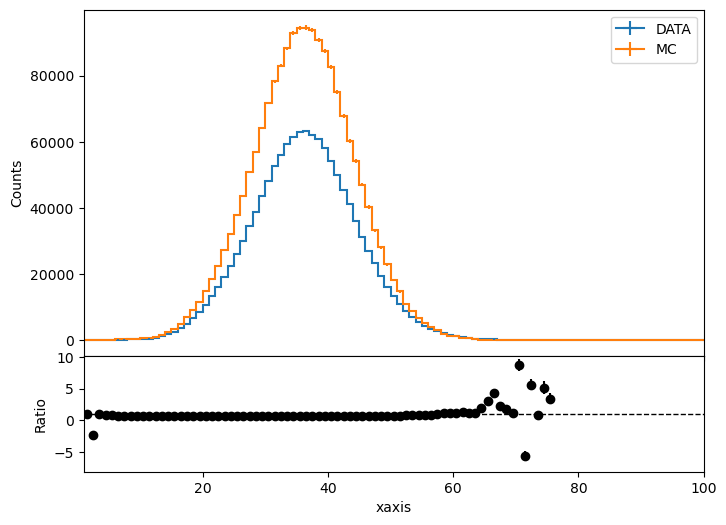

In [19]:
hists = uproot.open("../output/hists.root")
pileup_hist = uproot.open("../configs/pileupHistogram-Cert_Collisions2022_359022_362760_eraEFG_GoldenJson-13p6TeV-69200ub-99bins.root")

plot = "num_pvs"

h1 = hists.get("mc_" + plot).to_hist()
h2 = hists.get("data_" + plot).to_hist()
h3 = pileup_hist.get("pileup").to_hist()

fig = plt.figure(figsize=(8, 6))
main_ax_artists, sublot_ax_arists = h2.plot_ratio(
    h1,
    rp_denom_label="MC",
    rp_num_label="DATA",
    rp_uncert_draw_type="line",
)
# main_ax_artists, sublot_ax_arists = h3.plot_ratio(
#     h1,
#     rp_denom_label="MC",
#     rp_num_label="DATA",
#     rp_uncert_draw_type="line",
# )